# Ciclo de vida completo de un modelo de Machine Learning - dataset California Housing

**Objetivo:**

Predecir el precio medio de la vivienda.
    
Este notebook recorre todo el flujo: exploración, outliers, transformaciones, pipeline, validación cruzada y guardado del modelo

<div style="background-color:#fffccf; padding: 20px; font-size: 14px; border-radius: 8px">

## 🧠 Ciclo de vida de un modelo de Machine Learning

Cuando creamos un modelo de Machine Learning, no basta con entrenarlo y ya. Hay todo un **proceso profesional** que sigue una estructura clara. A eso lo llamamos **ciclo de vida de un modelo ML**.

Este proceso incluye:

- Obtener los datos
- Explorar y limpiarlos
- Detectar y tratar valores extremos (outliers)
- Transformar las variables (escalar, codificar...)
- Entrenar el modelo
- Validarlo correctamente
- Guardarlo y reutilizarlo en producción

💡 Hoy vamos a recorrer ese ciclo completo con un ejemplo real: **el precio medio de viviendas en California**.

</div>


<div style="background-color:#e0f7fa; padding: 20px; font-size: 14px; border-radius: 8px">

## 🏡 Dataset: California Housing

El conjunto de datos de viviendas en California contiene información sobre miles de barrios de ese estado, como:

- Ingresos medios de las familias
- Edad media de las casas
- Número medio de habitaciones
- Densidad de población
- Latitud y longitud

Nuestro objetivo será **predecir el precio medio de las viviendas** a partir del resto de variables. Es un caso de **regresión** (predicción numérica).

</div>


<div style="background-color:#ffe6e6; padding: 20px; font-size: 14px; border-radius: 8px">

## 🚨 Detección de Outliers

Los **outliers** (valores atípicos) son datos que se alejan mucho de lo normal.  
Pueden ser errores o situaciones excepcionales.

¿Por qué nos importan?
- Pueden afectar negativamente al entrenamiento del modelo
- Distorsionan estadísticas como la media
- Algunos modelos son muy sensibles a ellos

Aquí aprenderemos a detectarlos usando el **método del rango intercuartílico (IQR)** y cómo tratarlos.

</div>


<div style="background-color:#e6f0ff; padding: 20px; font-size: 14px; border-radius: 8px">

## 🧪 ¿Qué es un preprocesador?

Antes de entrenar un modelo, necesitamos **preparar nuestros datos**: convertir texto en números, escalar variables, eliminar problemas de formato, etc.  
El objeto `preprocesador` en scikit-learn es quien se encarga de eso de forma automática.

### 🧩 ¿Qué hace exactamente?

En este caso usamos un **`ColumnTransformer`**, que nos permite aplicar diferentes transformaciones a diferentes columnas del dataset:

- 🧮 A las variables **numéricas**, les aplica `StandardScaler` para que todas tengan media 0 y desviación 1.
- 🧾 A las variables **categóricas**, les aplica `OneHotEncoder` para convertir texto en columnas numéricas (0/1).

### 🎯 ¿Para qué sirve?

- El modelo no puede entender variables en texto ni con escalas muy diferentes.
- El preprocesador convierte todo en un **formato numérico uniforme**.
- Es esencial cuando trabajamos con datos reales.

### 💡 Ventaja clave

Podemos usar el `preprocesador` dentro de un **`Pipeline`**, de forma que:
- Los datos se transforman automáticamente cada vez que usamos `.fit()` o `.predict()`.
- No necesitamos transformar los datos manualmente fuera del modelo.
- Todo el flujo se vuelve más limpio, seguro y profesional.

</div>

<div style="background-color:#eaffea; padding: 20px; font-size: 14px; border-radius: 8px">

## 🛠️ ¿Qué es un Pipeline?

Un **pipeline** es una forma profesional de encadenar todos los pasos de transformación y modelado en un solo bloque.

Ventajas:
- Más limpio y estructurado
- Evita errores
- Fácil de reutilizar y probar

En este ejemplo vamos a construir un pipeline que:
1. Escale las variables numéricas
2. Codifique la variable categórica
3. Entrene el modelo final

</div>


<div style="background-color:#f0e6ff; padding: 20px; font-size: 14px; border-radius: 8px">

## 🔁 Validación cruzada

Cuando entrenamos un modelo, queremos saber **si realmente es bueno o solo funciona con los datos que le hemos dado**.

La **validación cruzada** nos ayuda a comprobarlo dividiendo los datos en varias partes y probando el modelo varias veces.

Hoy vamos a usar:
- `KFold`: divide el conjunto de datos en *k* partes
- `cross_val_score`: calcula el rendimiento en cada parte

Esto nos da una evaluación mucho más realista y profesional.

</div>


<div style="background-color:#f5f5f5; padding: 20px; font-size: 14px; border-radius: 8px">

## 💾 Guardar el modelo entrenado

Una vez entrenamos un buen modelo, lo queremos **guardar para usarlo más adelante**.

Esto se llama **persistencia del modelo** y nos permite:

- Reutilizar el modelo sin tener que entrenarlo de nuevo
- Integrarlo en una web, API o app
- Llevarlo a producción

Hoy lo vamos a guardar con `joblib` como archivo `.pkl` y luego lo cargaremos para predecir con nuevos datos.

</div>


### Código completo

In [96]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [97]:
# Paso 2: Cargar los datos desde el CSV local
data = pd.read_csv("files/california_housing.csv")

In [98]:
# Paso 3: Exploración inicial del dataset
print("\nPrimeras filas del dataset:")
print(data.head())
print("\nDimensiones:", data.shape)
print("\nTipos de datos:")
print(data.dtypes)


Primeras filas del dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dimensiones: (20640, 9)

Tipos de datos:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


In [99]:
# Paso 4: Análisis estadístico básico
print("\nResumen estadístico:")
print(data.describe())


Resumen estadístico:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min       

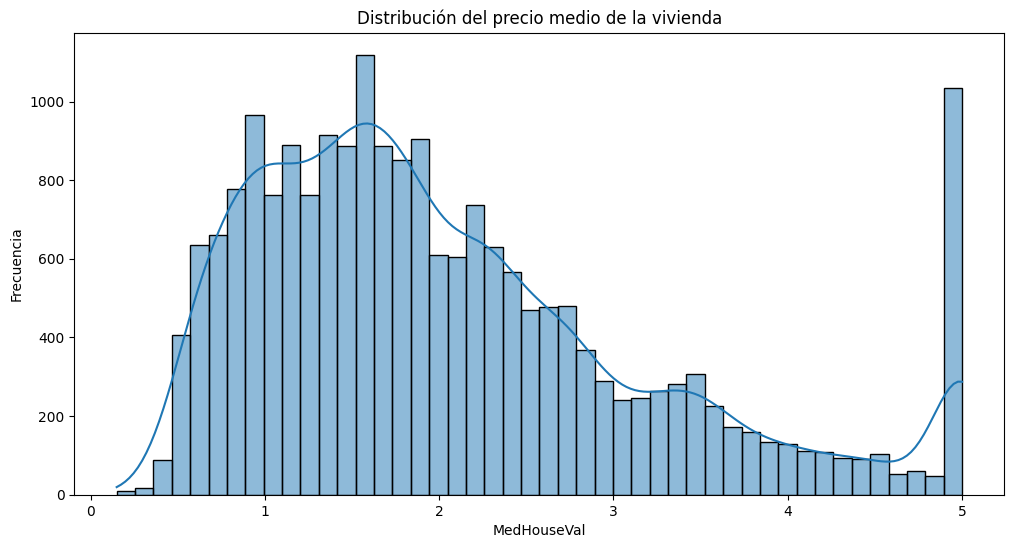

In [100]:
# Paso 5: Visualización de distribuciones
plt.figure(figsize=(12, 6))
sns.histplot(data['MedHouseVal'], kde=True)
plt.title('Distribución del precio medio de la vivienda')
plt.xlabel('MedHouseVal')
plt.ylabel('Frecuencia')
plt.show()

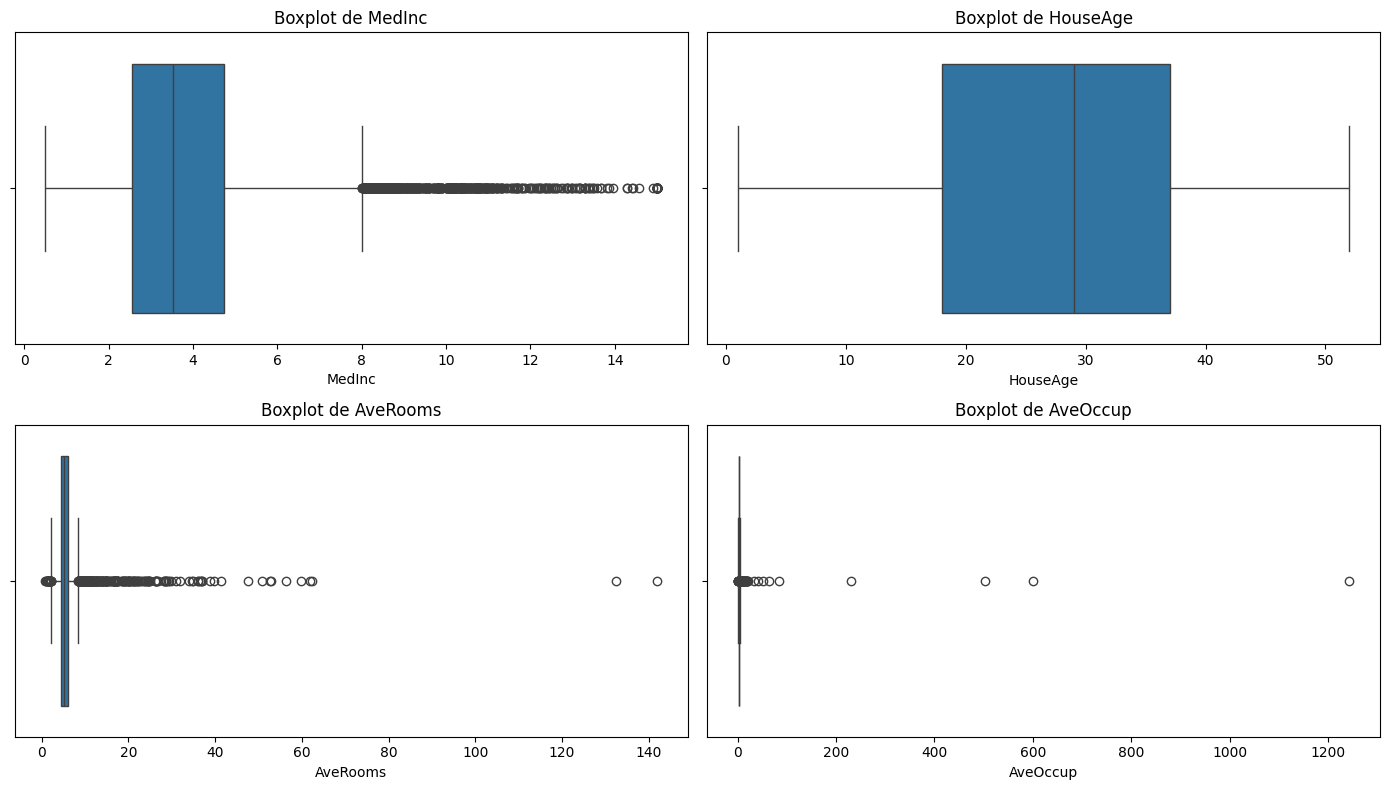

In [101]:
# Paso 6: Detección de outliers con boxplots en algunas variables clave
variables = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']
plt.figure(figsize=(14, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=data[var])
    plt.title(f'Boxplot de {var}')
plt.tight_layout()
plt.show()

In [102]:
# Paso 7: Tratamiento de outliers (usamos IQR para 'AveRooms')
Q1 = data['AveRooms'].quantile(0.25)
Q3 = data['AveRooms'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

data_filtrado = data[(data['AveRooms'] >= limite_inferior) & (data['AveRooms'] <= limite_superior)]
print("\nFilas antes de eliminar outliers:", data.shape[0])
print("Filas después de eliminar outliers en 'AveRooms':", data_filtrado.shape[0])


Filas antes de eliminar outliers: 20640
Filas después de eliminar outliers en 'AveRooms': 20129


In [103]:
# Paso 8: Crear una variable categórica artificial (zona geográfica)
def clasificar_zona(lat):
    if lat > 37:
        return 'norte'
    elif lat < 33:
        return 'sur'
    else:
        return 'centro'

data_filtrado.loc[:, 'zona'] = data_filtrado['Latitude'].apply(clasificar_zona)

C:\Users\ab_ro\AppData\Local\Temp\ipykernel_2856\915830372.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado.loc[:, 'zona'] = data_filtrado['Latitude'].apply(clasificar_zona)


In [104]:
# Paso 9: Definir variables predictoras (X) y variable objetivo (y)
X = data_filtrado.drop(['MedHouseVal'], axis=1)
y = data_filtrado['MedHouseVal']

In [105]:
# Paso 10: Separar variables numéricas y categóricas
variables_numericas = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
variables_numericas.remove('Latitude')
variables_numericas.remove('Longitude')
variables_categoricas = ['zona']

In [106]:
# Paso 11: Crear el preprocesador con ColumnTransformer
preprocesador = ColumnTransformer([
    ('escala', StandardScaler(), variables_numericas),
    ('onehot', OneHotEncoder(), variables_categoricas)
])

In [107]:
# Paso 12: Crear el Pipeline completo con modelo lineal
pipeline = Pipeline([
    ('preprocesado', preprocesador),
    ('modelo', LinearRegression())
])

In [108]:
# Paso 13: Validación cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')
print("\nResultados de R^2 en validación cruzada:")
print(scores)
print("Media de R^2:", np.mean(scores))


Resultados de R^2 en validación cruzada:
[0.51806434 0.55699301 0.5577503  0.55885927 0.56984336]
Media de R^2: 0.5523020559613063


In [109]:
# Paso 14: Entrenar modelo final con todos los datos
pipeline.fit(X, y)

Pipeline(steps=[('preprocesado',
                 ColumnTransformer(transformers=[('escala', StandardScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['zona'])])),
                ('modelo', LinearRegression())])

In [110]:
# Paso 15: Guardar el modelo entrenado en un archivo .pkl
joblib.dump(pipeline, 'modelo_california.pkl')
print("\nModelo guardado como 'modelo_california.pkl'")


Modelo guardado como 'modelo_california.pkl'


In [111]:
# Paso 16: Cargar el modelo guardado y hacer predicciones
modelo_cargado = joblib.load('modelo_california.pkl')
una_fila = X.iloc[[0]]
prediccion = modelo_cargado.predict(una_fila)
print("\nPredicción con modelo cargado:", prediccion)


Predicción con modelo cargado: [4.35546875]
